# Predicting Heart Disease Using Machine Learning

# Problem Definition
### Given clinical parameters about a patient, can we predict whether or not they have heart disease?

# Preparing Tools

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#We here import the models we will be using in this project
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluators
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report,RocCurveDisplay,f1_score



# Load Data

 The original data came from the Cleveland database from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from Kaggle.

The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

In [5]:
df = pd.read_csv('heart-disease (1).csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Counting Number Of Male and Female in The Dataset

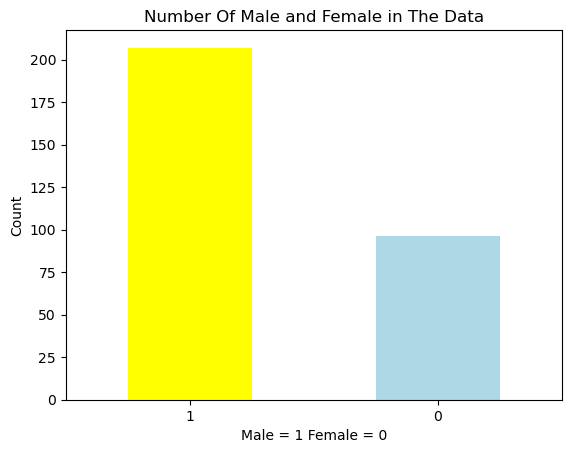

In [22]:
df.sex.value_counts().plot(kind = "bar",color = ['yellow','lightblue'])
plt.xlabel('Male = 1 Female = 0')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.title('Number Of Male and Female in The Data');

# Comparing Target Column and Sex Column

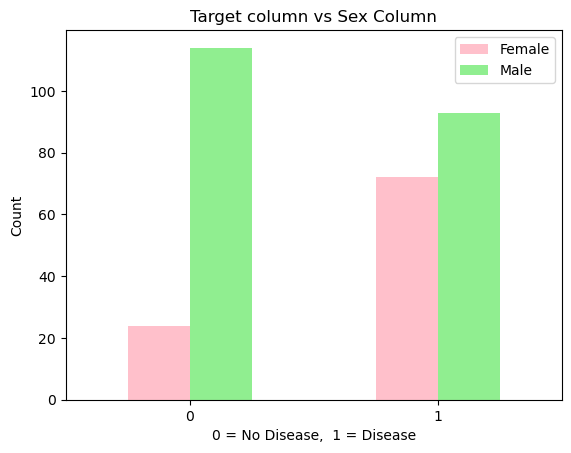

In [33]:
pd.crosstab(df.target,df.sex).plot(kind = "bar",color = ['pink','lightgreen']);
plt.xticks(rotation = 0)
plt.xlabel('0 = No Disease,  1 = Disease');
plt.ylabel('Count')
plt.title('Target column vs Sex Column');
plt.legend(['Female','Male']);

# Age vs Max Heart Rate

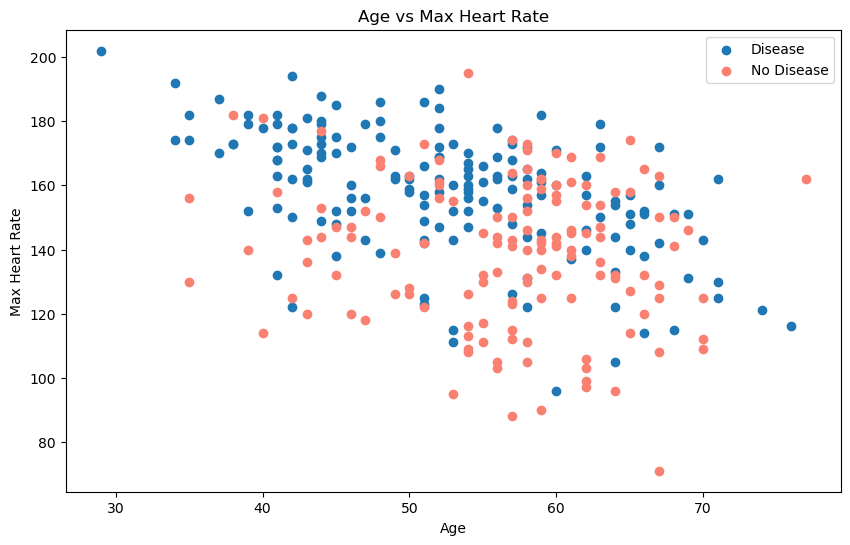

In [41]:
plt.figure(figsize = (10,6))
plt.scatter(x= df.age[df.target == 1],y = df.thalach[df.target == 1])

plt.scatter(x= df.age[df.target == 0],y = df.thalach[df.target == 0],color = 'salmon')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Age vs Max Heart Rate')
plt.legend(['Disease','No Disease']);

## Checking Distribution Of Age Column

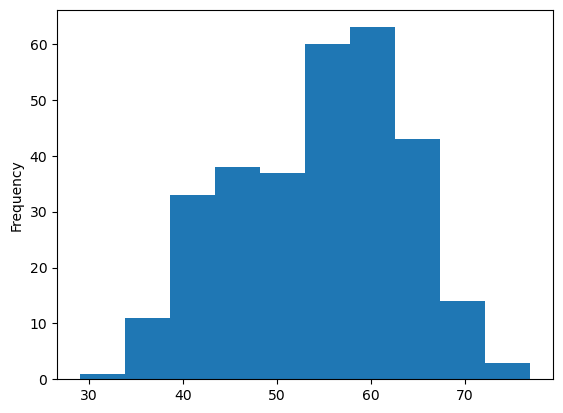

In [44]:
df.age.plot.hist();

# Heart Disease Frequency with Different Chest Pain Type

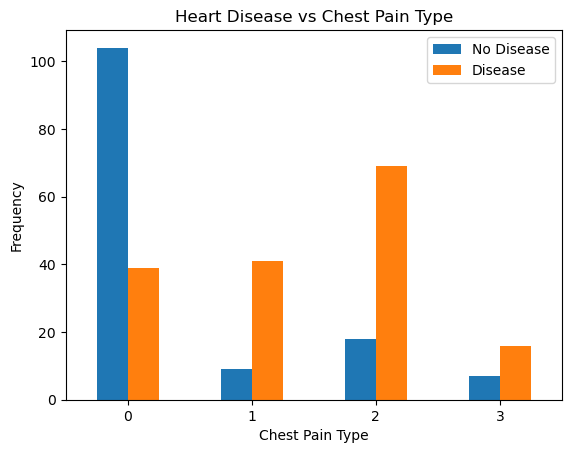

In [49]:
pd.crosstab(df.cp,df.target).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.title('Heart Disease vs Chest Pain Type')
plt.legend(['No Disease','Disease'])

# Correlation

In [50]:
corr = df.corr()

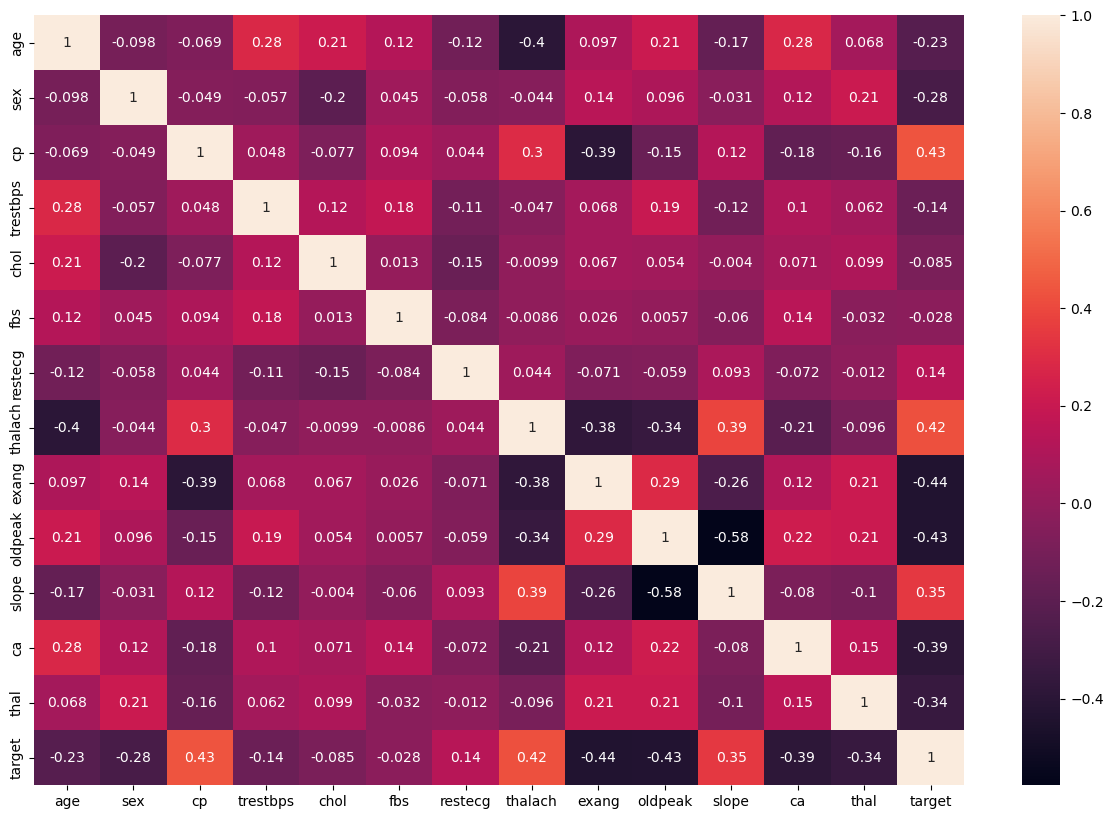

In [56]:
plt.figure(figsize = (15,10))
sns.heatmap(corr,annot = True);

# Dependent and Independent Variable

In [58]:
x = df.drop('target',axis = 1)
y = df.target

# Splitting Data as Training and Test


In [63]:
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

# Choosing Best Model By checking score

In [66]:
models = {'KNN': KNeighborsClassifier(),
         'Logistic' : LogisticRegression(),
         'RandomForest' : RandomForestClassifier()}

def fit_and_score(models,x_train,x_test,y_train,y_test):
    models_score = {}
    np.random.seed(42)
    for name,model in models.items():
        model.fit(x_train,y_train)
        models_score[name] = model.score(x_test,y_test)
    return models_score
        
        
    

In [67]:
models_score = fit_and_score(models = models,x_train = x_train,x_test = x_test,y_train = y_train,y_test = y_test)
models_score

C:\Users\goela\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic': 0.8852459016393442,
 'RandomForest': 0.8360655737704918}

# Model Comparison

<Axes: >

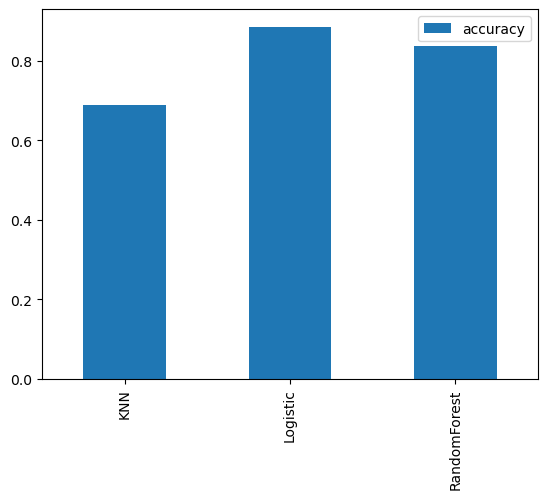

In [74]:

sc = pd.DataFrame(models_score,index = ['accuracy'])
sc.T.plot(kind = "bar")

# Tuning Model With Randomized Search

In [76]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [77]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [79]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [80]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [86]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

## Now for Random Forest

In [90]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [88]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [92]:
rs_rf.score(x_test,y_test)

0.8688524590163934

# Evaluation Of Model

In [94]:
y_preds = rs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

# Confusion Matrix

In [104]:
cm = confusion_matrix(y_test,y_preds)

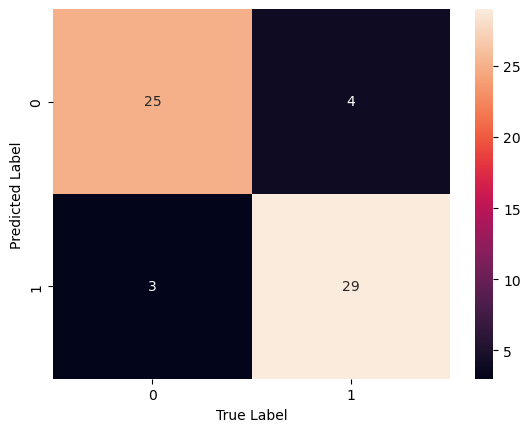

In [110]:
sns.heatmap(cm,annot =True);
plt.xlabel('True Label');
plt.ylabel('Predicted Label');

# Classification Report

In [115]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Feature Importnace

In [116]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [117]:
clf = LogisticRegression(solver = 'liblinear',C = 0.23357214690901212)

In [122]:
clf.fit(x_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [123]:
clf.coef_

array([[ 0.00369922, -0.90424089,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490194,  0.02472938, -0.63120405, -0.57590939,
         0.47095134, -0.65165349, -0.69984206]])

In [126]:
feat = dict(zip(df.columns,clf.coef_[0]))

In [127]:
feat

{'age': 0.003699220218693,
 'sex': -0.9042408909021112,
 'cp': 0.6747282639169492,
 'trestbps': -0.01161340193177967,
 'chol': -0.001703644306964925,
 'fbs': 0.047876883381437196,
 'restecg': 0.33490194499930287,
 'thalach': 0.024729383642503815,
 'exang': -0.6312040482089574,
 'oldpeak': -0.5759093926828687,
 'slope': 0.470951337854335,
 'ca': -0.651653485595126,
 'thal': -0.6998420593767237}

In [128]:
fdf = pd.DataFrame(feat,index = [0]);

Text(0.5, 1.0, 'Feature Importance')

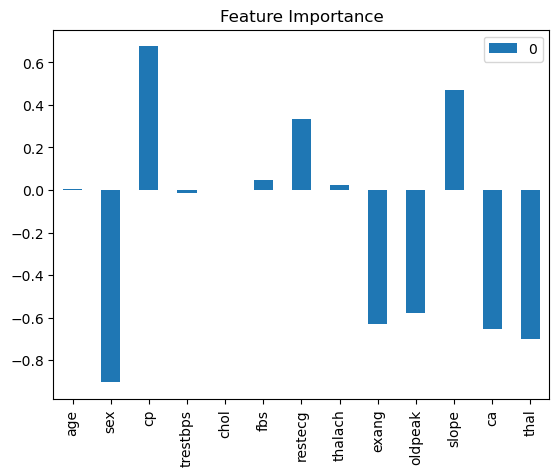

In [132]:
fdf.T.plot(kind = 'bar')
plt.title('Feature Importance')